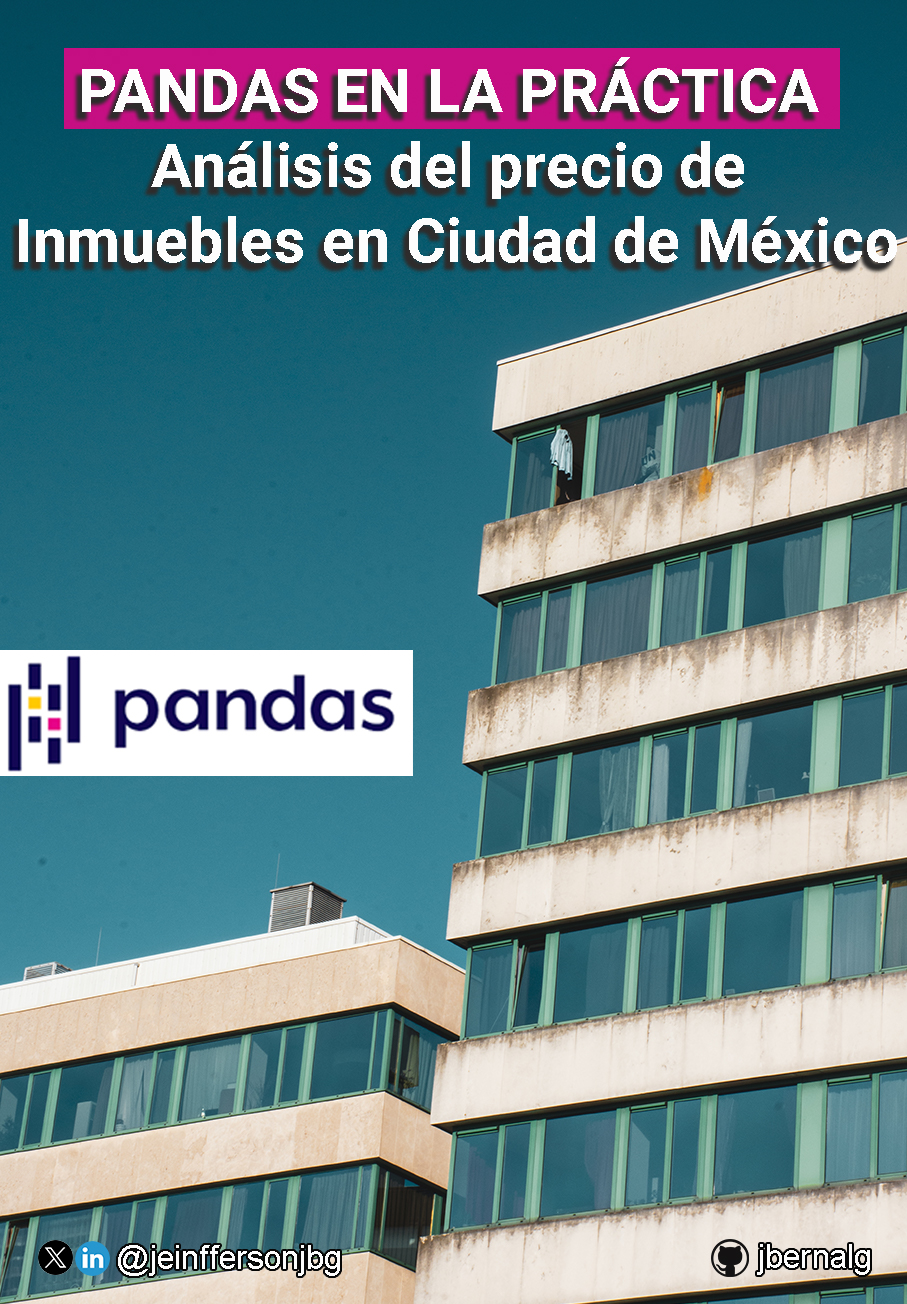

# __Análisis de Inmuebles en la Ciudad de México__

## Contexto

Hemos sido contratados como científicos de datos por una empresa inmobiliaria. Nuestra principal función es brindar soporte a las demandas del equipo de Aprendizaje Automático (ML) y del equipo de Desarrollo (DEV) de esta empresa.

Ambos equipos nos asignarán tareas que debemos realizar según las necesidades que tengan.

## Importar librerías

In [1]:
import pandas as pd

## Importar base de datos

In [3]:
url = 'https://gist.githubusercontent.com/ahcamachod/a572cfcc2527046db93101f88011b26e/raw/ffb13f45a79d31223e645611a119397dd127ee3c/alquiler.csv'
dataset = pd.read_csv(url, sep=';')
dataset.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN


## Acerca de los datos

La base de datos que vamos a utilizar contiene información sobre diferentes tipos de propiedades en Ciudad de México (CDMX), como departamentos, casas, locales comerciales, entre otros.

En esta base de datos, encontraremos información sobre los valores de alquiler de cada propiedad, los costos de condominio, impuestos inmobiliarios y también sus características, como el número de habitaciones, suites, garages, etc.

## Exploración básica de los datos

In [3]:
# mostrar 10 filas aleatorias del df
dataset.sample(10)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
2083,Conjunto Comercial/Sala,Santa Fe,0,1,0,44,3500.0,3150.0,980.0
23767,Conjunto Comercial/Sala,Santa Fe,0,1,0,31,8925.0,4095.0,805.0
20859,Conjunto Comercial/Sala,Centro Histórico,0,0,0,270,31500.0,14700.0,4686.5
23361,Casa,San Miguel Chapultepec,3,0,0,90,7000.0,NaN,NaN
19870,Departamento,Santa Fe,4,2,2,133,12250.0,5600.0,910.0
2494,Departamento,Del Valle,3,2,1,120,12250.0,3430.0,NaN
1477,Conjunto Comercial/Sala,Santa Fe,0,1,0,135,19250.0,4200.0,NaN
752,Departamento,Santa Fe,2,1,1,90,7700.0,4872.0,1011.5
15828,Departamento,Tlalnepantla,2,1,0,43,3500.0,840.0,87.5
6504,Departamento,Lomas de Chapultepec,2,1,0,108,17500.0,3783.5,980.0


In [4]:
# tipo de dato del df
type(dataset)

pandas.core.frame.DataFrame

In [5]:
# cantidad de filas y columnas del df
dataset.shape

(25121, 9)

> Hay 25.121 filas y 9 columnas.

In [6]:
# nombre de las columnas
dataset.columns 

Index(['Tipo', 'Colonia', 'Habitaciones', 'Garages', 'Suites', 'Area', 'Valor',
       'Condominio', 'Impuesto'],
      dtype='object')

In [7]:
# resumen de las variables
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25121 entries, 0 to 25120
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          25121 non-null  object 
 1   Colonia       25121 non-null  object 
 2   Habitaciones  25121 non-null  int64  
 3   Garages       25121 non-null  int64  
 4   Suites        25121 non-null  int64  
 5   Area          25121 non-null  int64  
 6   Valor         25107 non-null  float64
 7   Condominio    22495 non-null  float64
 8   Impuesto      18037 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


> El resumen nos muestra que hay valores faltantes en las variables Valor, Condominio e Impuesto. Las 3 variables son de tipo numérico.

In [8]:
# explorar columna Tipo
dataset['Tipo']

0                       Cocineta
1                           Casa
2        Conjunto Comercial/Sala
3                   Departamento
4                   Departamento
                  ...           
25116    Cochera/Estacionamiento
25117                   Cocineta
25118               Departamento
25119               Departamento
25120    Conjunto Comercial/Sala
Name: Tipo, Length: 25121, dtype: object

> El formato en que muestra la información es una serie de pandas.

In [9]:
# mostrar los valores unicos que conforman la variable Tipo
dataset['Tipo'].unique()

array(['Cocineta', 'Casa', 'Conjunto Comercial/Sala', 'Departamento',
       'Casa de Condominio', 'Edificio Completo', 'Departamento en Hotel',
       'Tienda/Salón', 'Casa Comercial', 'Casa de Vecindad',
       'Terreno Estándar', 'Cochera/Estacionamiento', 'Loft',
       'Galpón/Depósito/Almacén', 'Tienda en Centro Comercial', 'Rancho',
       'Posada/Chalé', 'Estudio', 'Hotel', 'Loteo/Condominio',
       'Industria'], dtype=object)

In [10]:
# mostrar valores de dos variables al mismo tiempo
dataset[['Habitaciones', 'Valor']]

,Habitaciones,Valor
0,1,5950.0
1,2,24500.0
2,0,18200.0
3,1,2800.0
4,1,2800.0
...,...,...
25116,0,49000.0
25117,0,2800.0
25118,2,4900.0
25119,2,10500.0


> Devuelve la información en formato dataframe de pandas.

## Demandas ML

### __EDA__

#### __¿Cuáles son los valores promedio de alquiler por tipo de propiedad?__

In [11]:
dataset.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN


In [12]:
# promedio general del valor de alquiler
dataset['Valor'].mean()

36885.05048392878

In [13]:
# agrupa los datos por la variable Tipo y promedia los valores de las demas variables
dataset.groupby('Tipo').mean(numeric_only=True)

,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
Tipo,,,,,,,
Casa,3.359633,1.897248,1.438532,289.943119,31453.177064,3699.421642,6629.404851
Casa Comercial,1.801980,2.118812,0.257426,370.277228,54735.841584,7622.192308,6166.063380
Casa de Condominio,4.319672,3.555738,3.247541,566.303279,51428.609836,5286.578804,15046.939394
Casa de Vecindad,1.974684,0.379747,0.215190,79.981013,5961.740506,413.444444,706.850000
Cochera/Estacionamiento,0.064935,1.376623,0.000000,18.662338,6995.454545,1069.075000,449.458333
Cocineta,0.836088,0.020661,0.041322,29.090909,4425.856061,1521.734214,280.701461
Conjunto Comercial/Sala,0.047175,2.686323,0.000352,236.323711,57675.214550,17489.361142,5425.980245
Departamento,2.504199,1.256367,0.891899,124.014292,18683.269431,6797.092951,2634.921081
Departamento en Hotel,1.419780,0.969231,0.758242,65.848352,16285.430769,7250.650602,1768.923885


In [14]:
# Promedio de los valores de alquiler por tipo de inmueble
dataset.groupby('Tipo')['Valor'].mean()

Tipo
Casa                           31453.177064
Casa Comercial                 54735.841584
Casa de Condominio             51428.609836
Casa de Vecindad                5961.740506
Cochera/Estacionamiento         6995.454545
Cocineta                        4425.856061
Conjunto Comercial/Sala        57675.214550
Departamento                   18683.269431
Departamento en Hotel          16285.430769
Edificio Completo             409418.080645
Estudio                         8400.000000
Galpón/Depósito/Almacén       299984.140138
Hotel                          87500.000000
Industria                     420000.000000
Loft                            9924.526316
Loteo/Condominio               92166.666667
Posada/Chalé                    5180.000000
Rancho                         38014.375000
Terreno Estándar              135364.444444
Tienda en Centro Comercial     32556.785714
Tienda/Salón                   56263.544252
Name: Valor, dtype: float64

In [15]:
# ordenar valores y motrarlo en formato df
dataset.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

,Valor
Tipo,
Cocineta,4425.856061
Posada/Chalé,5180.000000
Casa de Vecindad,5961.740506
Cochera/Estacionamiento,6995.454545
Estudio,8400.000000
Loft,9924.526316
Departamento en Hotel,16285.430769
Departamento,18683.269431
Casa,31453.177064


<AxesSubplot:ylabel='Tipo'>

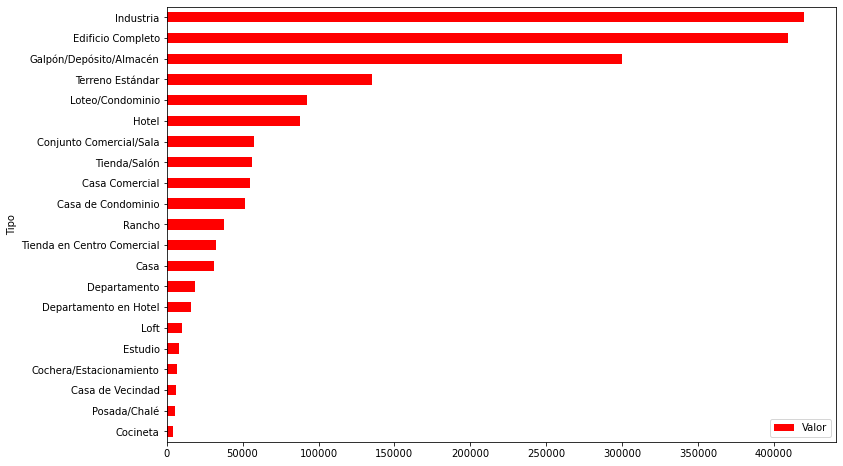

In [16]:
# Visualizacion de los promedios de los valores segun el inmueble
df_tipo_precio = dataset.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
df_tipo_precio.plot(kind='barh', figsize=(12,8), color='red')

> La grafica muestra que los inmuebles de tipo Industria presentan el valor promedio de alquiler mas alto, como era de esperarse.

> Los inmuebles de tipo Cocineta son los mas baratos.

#### __¿Cuáles son los valores promedio de alquiler de inmuebles residenciales?__

In [17]:
# valores unicos en la variable Tipo
dataset.Tipo.unique()

array(['Cocineta', 'Casa', 'Conjunto Comercial/Sala', 'Departamento',
       'Casa de Condominio', 'Edificio Completo', 'Departamento en Hotel',
       'Tienda/Salón', 'Casa Comercial', 'Casa de Vecindad',
       'Terreno Estándar', 'Cochera/Estacionamiento', 'Loft',
       'Galpón/Depósito/Almacén', 'Tienda en Centro Comercial', 'Rancho',
       'Posada/Chalé', 'Estudio', 'Hotel', 'Loteo/Condominio',
       'Industria'], dtype=object)

In [18]:
# guardamos los inmuebles comerciales en una lista
inmuebles_comerciales = ['Conjunto Comercial/Sala', 'Edificio Completo','Tienda/Salón', 'Casa Comercial',
                         'Terreno Estándar', 'Cochera/Estacionamiento', 'Galpón/Depósito/Almacén', 'Tienda en Centro Comercial',
                         'Hotel', 'Loteo/Condominio','Industria']

In [19]:
# Hacer una consulta a los datos
# buscar en Tipo los valores almacenados en 'inmuebles_comerciales' 
dataset.query('@inmuebles_comerciales in Tipo')

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
6,Conjunto Comercial/Sala,Centro Histórico,0,3,0,695,122500.0,67175.5,10605.0
11,Edificio Completo,Roma,0,0,0,536,98000.0,NaN,12470.5
24,Conjunto Comercial/Sala,Santa Fe,0,1,0,22,2450.0,NaN,NaN
26,Conjunto Comercial/Sala,Centro Histórico,0,5,0,1306,411390.0,68201.0,NaN
...,...,...,...,...,...,...,...,...,...
25107,Conjunto Comercial/Sala,Santa Fe,0,1,0,55,7000.0,3836.0,NaN
25110,Conjunto Comercial/Sala,Centro Histórico,0,0,0,140,14000.0,4942.0,1736.0
25112,Conjunto Comercial/Sala,Centro Histórico,0,0,0,32,2100.0,3622.5,290.5
25116,Cochera/Estacionamiento,Centro Histórico,0,0,0,755,49000.0,NaN,NaN


In [20]:
# buscar en Tipo los valores que no estan almacenados en 'inmuebles_comerciales' 
dataset.query('@inmuebles_comerciales not in Tipo')

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
5,Casa de Condominio,Santa Fe,5,4,5,750,77000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
25114,Departamento,Narvarte,1,0,0,28,3500.0,1260.0,87.5
25115,Casa de Condominio,Santa Fe,5,3,4,450,52500.0,5988.5,8162.0
25117,Cocineta,Centro Histórico,0,0,0,27,2800.0,1225.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5


In [21]:
# guardamos consulta en una df
df_inmuebles = dataset.query('@inmuebles_comerciales not in Tipo')
df_inmuebles.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
5,Casa de Condominio,Santa Fe,5,4,5,750,77000.0,NaN,NaN


<AxesSubplot:ylabel='Tipo'>

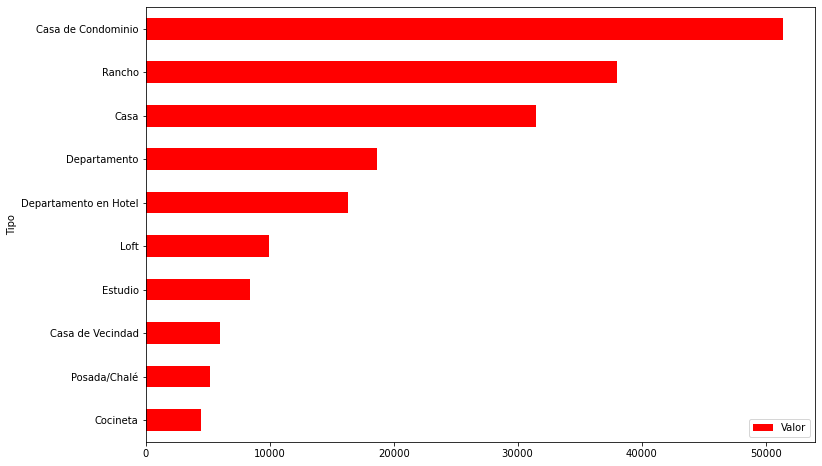

In [22]:
# Visualizacion de los promedios de los valores de inmuebles residenciales
df_tipo_precio = df_inmuebles.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
df_tipo_precio.plot(kind='barh', figsize=(12,8), color='red')

#### __¿Cuál es el porcentaje de cada tipo de propiedad en nuestra base de datos?__

In [23]:
# mostrar valores unicos de inmuebles
df_inmuebles.Tipo.unique()

array(['Cocineta', 'Casa', 'Departamento', 'Casa de Condominio',
       'Departamento en Hotel', 'Casa de Vecindad', 'Loft', 'Rancho',
       'Posada/Chalé', 'Estudio'], dtype=object)

In [24]:
# mostrar cantidad por inmueble
df_inmuebles.Tipo.value_counts()

Departamento             14764
Cocineta                   726
Casa de Condominio         610
Casa                       545
Departamento en Hotel      455
Casa de Vecindad           158
Loft                        38
Rancho                       8
Estudio                      4
Posada/Chalé                 1
Name: Tipo, dtype: int64

In [25]:
# mostrar porcentajes de cada inmueble
df_inmuebles.Tipo.value_counts(normalize=True)

Departamento             0.852967
Cocineta                 0.041943
Casa de Condominio       0.035242
Casa                     0.031487
Departamento en Hotel    0.026287
Casa de Vecindad         0.009128
Loft                     0.002195
Rancho                   0.000462
Estudio                  0.000231
Posada/Chalé             0.000058
Name: Tipo, dtype: float64

<AxesSubplot:xlabel='Tipos', ylabel='Porcentajes'>

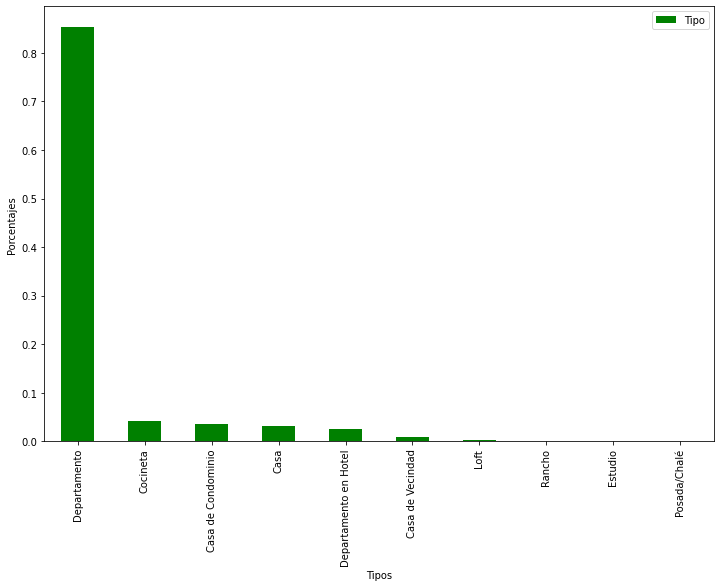

In [26]:
# visualizacion del porcentaje por tipo de inmueble
pct_tipo = df_inmuebles.Tipo.value_counts(normalize=True).to_frame()
pct_tipo.plot(kind='bar', figsize=(12,8), color='green', xlabel='Tipos', ylabel='Porcentajes')

> El 85% de los inmuebles son departamentos. El resto corresponde a los demas tipos de inmuebles por lo que el conjunto de datos esta muy desbalanceado.

> Nos enfocamos solo en los departamentos debido a que son el tipo de inmueble mas frecuente

In [27]:
# seleccionar solo registros que sean departamento
df_inmuebles.query('Tipo == "Departamento"')

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
7,Departamento,Centro Histórico,1,0,0,36,4200.0,NaN,NaN
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
10,Departamento,Condesa,4,3,1,243,45500.0,7000.0,2810.5
...,...,...,...,...,...,...,...,...,...
25111,Departamento,Lomas de Chapultepec,3,0,1,80,10500.0,3535.0,871.5
25113,Departamento,Coyoacán,3,1,2,150,52500.0,4900.0,2100.0
25114,Departamento,Narvarte,1,0,0,28,3500.0,1260.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5


In [28]:
# guardamos df en una variable
df_dept = df_inmuebles.query('Tipo == "Departamento"')
df_dept.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
7,Departamento,Centro Histórico,1,0,0,36,4200.0,NaN,NaN
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
10,Departamento,Condesa,4,3,1,243,45500.0,7000.0,2810.5


#### __Calcular el promedio de habitaciones por departamento.__

In [29]:
df_dept.Habitaciones.mean()

2.5041994039555675

> El promedio de habitaciones por departamento son entre 2 y 3.

#### __Verificar cuántas colonias únicas existen en nuestra base de datos.__

In [30]:
# colonias unicas donde se encuentran los departamentos
df_col = df_dept.Colonia.unique()
len(df_col)

83

> Hay 83 colonias unicas donde estan los departamentos.

#### __Analizar qué colonias tienen el promedio de alquiler más alto.__

In [31]:
df_dept.groupby('Colonia')[['Valor']].mean().sort_values('Valor')

,Valor
Colonia,
Potrero de San Bernardino,1190.000000
Santa María Aztahuacán,1785.000000
San Antonio Tecomitl,2065.000000
Tláhuac,2275.000000
El Rodeo,2275.000000
...,...
Lomas de Chapultepec,30232.165189
Roma,32530.388539
Coyoacán,33205.218609


> La 3 colonias con valor promedio ma altos son: Los Alpes, Bosques de Aragon y Coyoacan.

#### __Crear un gráfico de barras horizontales que muestre las 5 colonias con los promedios de alquiler más altos.__

In [32]:
df_col = df_dept.groupby('Colonia')[['Valor']].mean().sort_values('Valor')
df_col = df_col[-5:]
df_col

,Valor
Colonia,
Lomas de Chapultepec,30232.165189
Roma,32530.388539
Coyoacán,33205.218609
Bosques de Aragón,35948.718750
Los Alpes,54250.000000


<AxesSubplot:ylabel='Valor Promedio'>

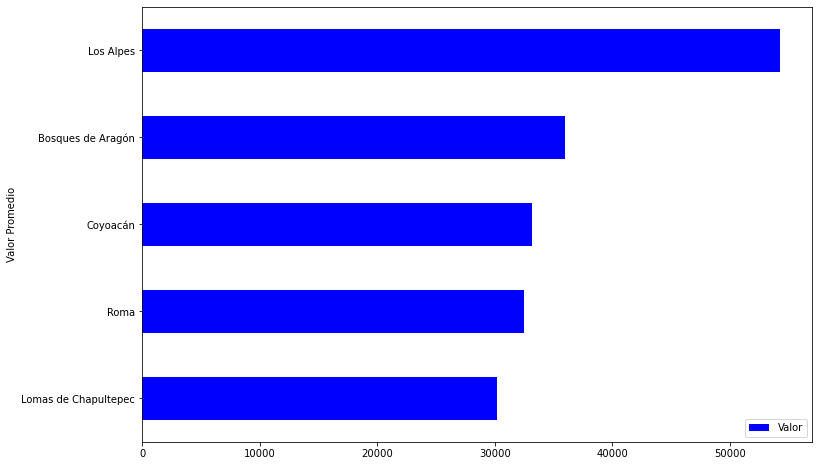

In [33]:
df_col.plot(kind='barh', figsize=(12,8), color='blue', xlabel='Valor Promedio', ylabel='Colonias')

### __Tratamiento de valores nulos__

In [43]:
# tabla de booleanos que senala los valores faltantes
df_dept.isnull()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,False,False,True,True
8,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
25111,False,False,False,False,False,False,False,False,False
25113,False,False,False,False,False,False,False,False,False
25114,False,False,False,False,False,False,False,False,False
25118,False,False,False,False,False,False,False,False,False


In [44]:
# conteo de valores nulos por variable
df_dept.isnull().sum()

Tipo               0
Colonia            0
Habitaciones       0
Garages            0
Suites             0
Area               0
Valor              7
Condominio       493
Impuesto        3797
dtype: int64

> Hay 7 valores faltantes en Valor, 493 en Condominio y 3797 en Impuesto.

Nos indican que los valores nulos deben ser rellenados con cero.

In [45]:
# asignar cero a los valores faltantes
df_dept = df_dept.fillna(0)

# verificar que no hayan valores faltantes
df_dept.isnull().sum()

Tipo            0
Colonia         0
Habitaciones    0
Garages         0
Suites          0
Area            0
Valor           0
Condominio      0
Impuesto        0
dtype: int64

### __Remover registros inconsistentes__

In [46]:
# filtrar registros con valores o condominio igual a cero
df_dept.query('Valor==0 | Condominio==0')

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
7,Departamento,Centro Histórico,1,0,0,36,4200.0,0.0,0.0
49,Departamento,Santa Fe,2,1,1,70,0.0,3395.0,238.0
74,Departamento,Ciudad de los Deportes,2,0,0,80,3500.0,0.0,0.0
116,Departamento,El Rosedal,2,1,0,50,3850.0,0.0,0.0
136,Departamento,Santa Fe,1,1,1,65,8225.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
24721,Departamento,Doctores,2,0,0,43,3150.0,0.0,56.0
24736,Departamento,Condesa,1,0,0,30,9100.0,0.0,0.0
24866,Departamento,Condesa,3,0,0,130,16100.0,0.0,0.0
24892,Departamento,Loma Bonita,1,0,0,40,1925.0,0.0,0.0


In [47]:
# obtener indices de los registros filtrados
df_dept.query('Valor==0 | Condominio==0').index

Int64Index([    7,    49,    74,   116,   136,   185,   199,   432,   504,
              527,
            ...
            24426, 24555, 24563, 24597, 24671, 24721, 24736, 24866, 24892,
            25014],
           dtype='int64', length=500)

In [48]:
# guardar indices de registros a remover
df_remover = df_dept.query('Valor==0 | Condominio==0').index

In [49]:
# remover registros del dataframe principal
df_dept.drop(df_remover, axis=0, inplace=True)

In [50]:
# verificar que no hayan registros con valor o condominio igual a cero
df_dept.query('Valor==0 | Condominio==0')

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto


Analicémos cómo va quedando el dataframe de departamento

In [ ]:
# mostrar como va quedando el df de departamento
df_dept.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,0.0
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
10,Departamento,Condesa,4,3,1,243,45500.0,7000.0,2810.5
13,Departamento,Santa Fe,2,1,1,67,5950.0,2061.5,514.5


In [52]:
df_dept.Tipo.unique()

array(['Departamento'], dtype=object)

> La variable Tipo no nos da información relevante ya que todos los registros son Departamento, por lo que la eliminamos.

In [53]:
# eliminar columna Tipo
df_dept.drop('Tipo', axis=1, inplace=True)
df_dept.sample(5)

,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
11417,Santa Fe,3,1,1,85,8400.0,3430.0,896.0
101,San Miguel Chapultepec,1,0,0,37,3500.0,997.5,84.0
6070,Napoles,2,0,1,86,14000.0,2719.5,0.0
10230,Villa de Cortés,3,1,0,85,4200.0,1400.0,0.0
6536,Coyoacán,2,2,2,220,52150.0,6300.0,3790.5


### __Creando filtros__

#### __1. Apartamentos que tienen 1 dormitorio y un alquiler menor a 4200.__

In [ ]:
# serie de booleanos senalando registros con 1 hab
seleccion1 = df_dept['Habitaciones'] == 1
seleccion1

3         True
4         True
8         True
10       False
13       False
         ...  
25111    False
25113    False
25114     True
25118    False
25119    False
Name: Habitaciones, Length: 14264, dtype: bool

In [ ]:
# serie de booleanos senalando registros con valor menor a 4200
seleccion2 = df_dept['Valor'] < 4200
seleccion2

3         True
4         True
8        False
10       False
13       False
         ...  
25111    False
25113    False
25114     True
25118    False
25119    False
Name: Valor, Length: 14264, dtype: bool

In [57]:
# unir ambas condiciones en una variable
filtro1 = (seleccion1) & (seleccion2)

# aplicar filtro al df
df_f1 = df_dept[filtro1]
df_f1

,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Del Valle,1,0,0,48,2800.0,805.0,0.0
19,Narvarte,1,0,0,48,2625.0,2702.0,87.5
37,Centro Histórico,1,0,0,27,2625.0,1298.5,66.5
61,Centro Histórico,1,1,0,37,3850.0,1890.0,3150.0
...,...,...,...,...,...,...,...,...
24710,Nativitas,1,0,0,40,3150.0,1522.5,0.0
24872,Peralvillo,1,0,1,69,3150.0,2240.0,441.0
24880,La Condesa,1,0,0,46,3850.0,1585.5,112.0
24943,Roma,1,0,0,21,3500.0,987.0,87.5


#### __2. Apartamentos que tienen al menos 2 dormitorios, un alquiler menor a 10500 y una superficie mayor a 70 m².__

In [58]:
# ir colocando las condiciones directamente en el filtro
filtro2 = (df_dept['Habitaciones'] >=2) & (df_dept['Valor'] < 10500) & (df_dept['Area'] > 70)

# aplicar filtro al df
df_f2 = df_dept[filtro2]
df_f2

,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
14,Narvarte,2,1,0,110,6650.0,2450.0,483.0
16,Narvarte,2,1,0,78,7000.0,2450.0,0.0
21,Roma,2,1,0,76,8750.0,2590.0,0.0
33,Santa Fe,3,1,1,72,8225.0,2100.0,245.0
58,Santa Fe,3,2,1,104,9100.0,4774.0,1421.0
...,...,...,...,...,...,...,...,...
25028,Del Valle,2,0,1,90,7700.0,1890.0,483.0
25062,Santa Fe,2,1,1,72,5950.0,3045.0,560.0
25063,Narvarte,3,1,0,75,6650.0,3010.0,493.5
25105,Santa Fe,2,1,1,85,7875.0,5463.5,689.5


### __Guardando los archivos__

Guardar datos separados con comas

In [60]:
# index=False para que no guarde los indices
df_dept.to_csv('inmuebles_ml.csv', index=False)

Guardar datos separados con punto y coma

In [61]:
df_dept.to_csv('inmuebles_ml.csv', index=False, sep=';')

Guardar datos con los filtros aplicados

In [62]:
df_f1.to_csv('inmuebles_ml_filtro1.csv', index=False, sep=';')
df_f2.to_csv('inmuebles_ml_filtro2.csv', index=False, sep=';')

## Demandas DEV

### __Primera solicitud__

El equipo de desarrollo del sitio web de la empresa solicitó la creación de dos nuevas columnas numéricas en nuestra base de datos. En el sitio web de las propiedades, desean presentar información más resumida en relación a los valores. Para esto, estas columnas serán importantes:

- valor_mensual: Esta columna debe contener los gastos mensuales de cada propiedad, incluyendo el alquiler y el condominio.

- valor_anual: Esta columna debe contener los gastos anuales por propiedad, es decir, el Impuesto más 12 meses de alquiler y condominio.

### __Crear columna valor_mensual__

Como es una solicitud del lado de desarrollo, necesitamos trabajar sobre los datos originales y no sólo con los datos de departamentos.  

In [4]:
dataset = pd.read_csv(url, sep=';')
dataset.shape

(25121, 9)

In [5]:
# crear columna solicitada
dataset['Valor_mensual'] = dataset['Valor'] + dataset['Condominio']
dataset.head() 

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0,7700.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5,32270.0
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0,4165.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN,3605.0


### __Crear columna valor_anual__

In [6]:
dataset['Valor_anual'] = dataset['Valor_mensual']*12 + dataset['Impuesto']
dataset.tail()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual,Valor_anual
25116,Cochera/Estacionamiento,Centro Histórico,0,0,0,755,49000.0,NaN,NaN,NaN,NaN
25117,Cocineta,Centro Histórico,0,0,0,27,2800.0,1225.0,87.5,4025.0,48387.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5,6681.5,80307.5
25119,Departamento,Lomas de Chapultepec,2,0,0,70,10500.0,2660.0,NaN,13160.0,NaN
25120,Conjunto Comercial/Sala,Centro Histórico,0,0,0,250,22750.0,14721.0,3881.5,37471.0,453533.5


### __Segunda solicitud__

El equipo de desarrollo solicitó la creación de dos columnas adicionales. Sin embargo, esta vez son categóricas:

- Descripcion: Esta columna debe contener un resumen de la información clave de las propiedades que se mostrarán en el sitio web: tipo de propiedad, barrio, cantidad de habitaciones y plazas de estacionamiento.

- Tiene_suite: Esta debe ser una columna que indique únicamente si la propiedad tiene o no suites, sin importar la cantidad.

### __Crear columna Descripcion__

In [12]:
# Ojo, al concatenar varias columnas debes convertir las numericas a tipo string
dataset['Descripcion'] = dataset['Tipo'] +' en la colonia ' + dataset['Colonia'] + \
                        ' con ' + dataset['Habitaciones'].astype(str) + ' habitaciones y ' + \
                        dataset['Garages'].astype(str) + ' plazas de estacionamiento'

dataset.sample(5)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual,Valor_anual,Descripcion
11890,Departamento,Bosques de las Lomas,3,1,1,106,21000.0,6233.5,1263.5,27233.5,328065.5,Departamento en la colonia Bosques de las Loma...
20072,Tienda/Salón,Narvarte,0,0,0,30,3850.0,525.0,NaN,4375.0,NaN,Tienda/Salón en la colonia Narvarte con 0 habi...
13923,Conjunto Comercial/Sala,Centro Histórico,0,4,0,1162,203350.0,109483.5,17528.0,312833.5,3771530.0,Conjunto Comercial/Sala en la colonia Centro H...
8308,Departamento,Roma,1,0,0,19,3430.0,1683.5,101.5,5113.5,61463.5,Departamento en la colonia Roma con 1 habitaci...
17395,Conjunto Comercial/Sala,Santa Fe,0,2,0,72,10150.0,9012.5,1946.0,19162.5,231896.0,Conjunto Comercial/Sala en la colonia Santa Fe...


In [13]:
# mostrar los datos del registro 500
dataset.iloc[500]

Tipo                                                  Departamento
Colonia                                                    Napoles
Habitaciones                                                     1
Garages                                                          0
Suites                                                           0
Area                                                            55
Valor                                                       7000.0
Condominio                                                  2047.5
Impuesto                                                     276.5
Valor_mensual                                               9047.5
Valor_anual                                               108846.5
Descripcion      Departamento en la colonia Napoles con 1 habit...
Name: 500, dtype: object

In [14]:
# motrar la descripcion del registro 500
dataset.iloc[500].Descripcion

'Departamento en la colonia Napoles con 1 habitaciones y 0 plazas de estacionamiento'

### __Crear columna Tiene_suite__

In [15]:
dataset['Tiene_suite'] = dataset['Suites'].apply(lambda x: 'Si' if x > 0 else 'No')
dataset.sample(5)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual,Valor_anual,Descripcion,Tiene_suite
18842,Departamento,Mixcoac,2,1,1,55,4550.0,1750.0,472.5,6300.0,76072.5,Departamento en la colonia Mixcoac con 2 habit...,Si
7653,Departamento,Coyoacán,2,1,0,95,17150.0,4473.0,NaN,21623.0,NaN,Departamento en la colonia Coyoacán con 2 habi...,No
17916,Departamento,Santa Fe,2,1,1,100,10500.0,5075.0,805.0,15575.0,187705.0,Departamento en la colonia Santa Fe con 2 habi...,Si
7318,Departamento,Coyoacán,2,1,0,72,10500.0,2870.0,NaN,13370.0,NaN,Departamento en la colonia Coyoacán con 2 habi...,No
17186,Departamento,Coyoacán,3,4,3,475,105000.0,19113.5,10304.0,124113.5,1499666.0,Departamento en la colonia Coyoacán con 3 habi...,Si


## Exportando archivo nuevamente

Guardar los datos con las solicitudes realizada por el equipo DEV

In [16]:
dataset.to_csv('inmuebles_dev.csv', index=False, sep=';')